<a href="https://colab.research.google.com/github/alkindiisda/bangkityog3/blob/master/bangkityog3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Assignment #05-W05-First Machine Learning Project - MLCC Project

Project Members:

*   Al Kindi Isda - alkindiisda@gmail.com
*   Bayu Dwi P - mr.ilhamtohari@gmail.com
*   Ilham Tohari - bayud40@gmail.com


# About the Dataset

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

# Pulling dataset from github

In [27]:
import os
import urllib.request
import matplotlib.pyplot as plt
urllib.request.urlretrieve('https://github.com/alkindiisda/bangkityog3/releases/download/1.0/email-spam-data.zip', 'email-spam-data.zip')
!unzip email-spam-data.zip

Archive:  email-spam-data.zip
replace emails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: emails.csv              


# Show raw data

In [20]:
import pandas as pd
df = pd.read_csv("emails.csv")
#rows and cols)
df.head(20)

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,16,12,8,1,0,52,2,0,0,0,1,0,5,5,56,2,7,1,1,10,0,0,10,0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,9,4,6,2,0,27,1,0,0,0,0,0,7,1,40,0,0,0,0,11,1,5,2,0,6,1,2,4,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,2,6,2,0,0,28,1,0,1,0,0,5,1,0,23,0,1,0,0,2,0,0,5,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,3,3,2,1,0,15,0,1,0,0,0,0,3,2,6,0,0,0,0,0,0,0,3,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,9,4,1,0,0,35,10,0,2,1,1,0,3,1,37,0,1,1,0,4,2,1,4,2,4,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
#emails details
print("total emails : ", len(df))
print  ("total spam emails : ", len(df[df['Prediction']==1]) )
print  ("total normal emails : ", len(df[df['Prediction']==0]) )

total emails :  5172
total spam emails :  1500
total normal emails :  3672


Text(0.5, 1.0, 'Plot of Emails count with email type')

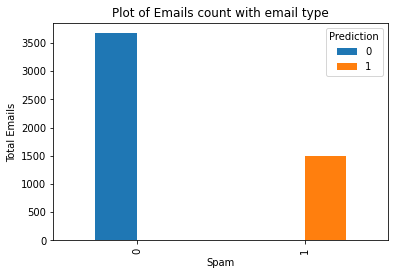

In [25]:
#plot email
df1 = df.groupby(['Prediction','Prediction'])['Prediction','Prediction'].size().unstack()

ax=df1.plot(kind='bar')
ax.set_ylabel("Total Emails")
ax.set_xlabel("Spam")
ax.set_title("Plot of Emails count with email type")

KeyError: ignored

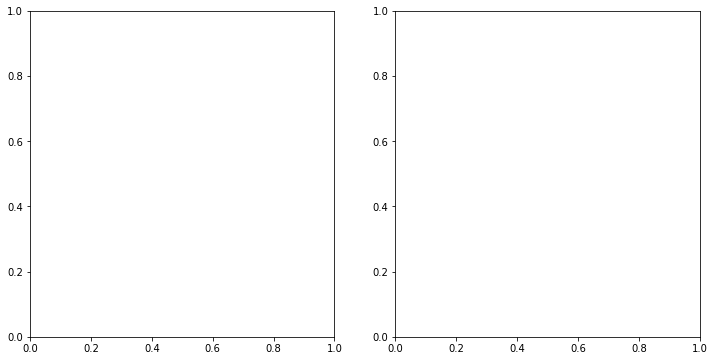

In [28]:
#frequency

bins = [0,100,200,300,350,400,500,600,800,1000,1500,2000,3000,4000,5000,6000,10000,20000]


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
fig.subplots_adjust(hspace=.5)

df_sub=df[ (df['Prediction']==0)]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res1=df1.plot(kind='bar',ax=axes[0])
res1.set_xlabel('Email tokens length')
res1.set_ylabel('Frequency')
res1.set_title('Token length Vs Frequency for Enron Normal Emails')


df_sub=df[(df['Prediction']==1)]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res2=df1.plot(kind='bar',ax=axes[1])
res2.set_xlabel('Email tokens length')
res2.set_ylabel('Frequency')
res2.set_title('Token length Vs Frequency for Enron Spam Emails')

# Preprocessing

total emails :  5172
total spam emails :  1500
total normal emails :  3672
